In [2]:
import pandas

## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

## Load data

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [4]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:, 0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:, 0]

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [6]:
m1 = np.mean(x_train[y_train == 0], axis=0)
m2 = np.mean(x_train[y_train == 1], axis=0)
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [2.47107265 1.97913899] mean vector of class 2: [1.82380675 3.03051876]


## 2. Compute the Within-class scatter matrix SW

In [7]:
sw = np.sum([np.mat(t-m1).T * np.mat(t-m1) for t
             in x_train[y_train == 0]], axis=0
            ) + np.sum([(np.mat(t-m2)).T * np.mat(t-m2)
                        for t in x_train[y_train == 1]], axis=0)

In [10]:
assert sw.shape == (2, 2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[140.40036447  -5.30881553]
 [ -5.30881553 138.14297637]]


## 3.  Compute the Between-class scatter matrix SB

In [11]:
sb = np.mat((m2-m1)).T * np.mat(m2-m1)

In [12]:
assert sb.shape == (2, 2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [19]:
w = np.mat(sw).I*np.mat(m2-m1).T
# print(w)
w = w/np.linalg.norm(w)

[[-0.00432865]
 [ 0.00744446]]


In [14]:
assert w.shape == (2, 1)
print(f" Fisher’s linear discriminant: {w}")


 Fisher’s linear discriminant: [[-0.50266214]
 [ 0.86448295]]
[[-0.50266214]
 [ 0.86448295]]


## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score 
you can use accuracy_score function from sklearn.metric.accuracy_score

In [15]:
#another method with higher accuracy but isn;t the requested one 
# a = (np.mat(x_test)*np.mat(w))
# print(a.shape)
threshold = np.mat(w).T*np.mat((m2+m1)/2).T
print(threshold)
# y_pred = np.zeros((250,1), int)
# y_pred[np.mat(x_test)*np.mat(w)>threshold] = 1
# y_pred = y_pred.reshape(250,)
# # print(y_pred)
# # print(y_test)
# acc = accuracy_score(y_test, y_pred)
# print(f"Accuracy of test-set {acc}")

[[1.08594521]]


In [16]:
y_pred = np.zeros((x_test.shape[0], 1), int)
for i in range(x_test.shape[0]):
    distances = np.abs(np.mat(x_train)*np.mat(w) -
                       np.mat(x_test[i, :])*np.mat(w))
    min_index = np.argmin(distances)
    y_pred[i] = y_train[min_index]
y_pred = y_pred.reshape(x_test.shape[0],)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.88


## 6. Plot the 1) projection line 2) Decision boundary and colorize the data with each class
### the result should look like this [image](https://i2.kknews.cc/SIG=fe79fb/26q1000on37o7874879n.jpg) (Red line: projection line, Green line: Decision boundary)

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

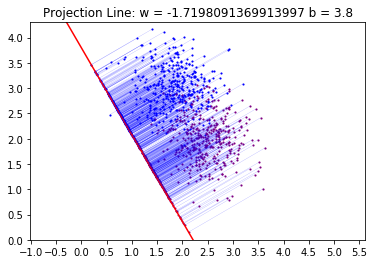

In [26]:
x_major_locator = MultipleLocator(0.5)
#把x轴的刻度间隔设置为0.5，并存在变量里
y_major_locator = MultipleLocator(0.5)
#把y轴的刻度间隔设置为0.5，并存在变量里
ax = plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
# #把x轴的主刻度设置为1的倍数
# plt.xlim(-0.5, 5.1)
# plt.ylim(0, 4.3)
plt.axis('equal')
plt.xlim(-0.5, 5.1)
plt.ylim(0, 4.3)
slope = w[1, 0]/w[0, 0]
ax.set_title('Projection Line: w = %.16f b = 3.8' % slope)
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1],
            s=5, color='blue', marker=".")
proj = np.zeros((x_train.shape[0], 2))
proj[:, 0] = (x_train[:, 0]+(w[1, 0]/w[0, 0])*x_train[:, 1] -
              (w[1, 0]/w[0, 0])*3.8)/(((w[1, 0]/w[0, 0])**2)+1)
proj[:, 1] = (w[1, 0]/w[0, 0])*proj[:, 0]+3.8
plt.scatter(proj[y_train == 1][:, 0], proj[y_train == 1][:, 1],
            s=3, color='blue', marker=".")
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1],
            s=5, color='purple', marker=".")
plt.scatter(proj[y_train == 0][:, 0], proj[y_train == 0][:, 1],
            s=3, color='purple', marker=".")
# plt.plot([x_train[:, 0].min(), x_train[:, 0].max()],
#          [-w[0, 0]/w[1, 0]*x_train[:, 0].min()+threshold[0, 0]/w[1, 0],
#           -w[0, 0]/w[1, 0]*x_train[:, 0].max()+threshold[0, 0]/w[1, 0]],
         # color='green')
plt.plot([-1, 3], [w[1, 0]/w[0, 0]*-1+3.8, w[1, 0]/w[0, 0]*3+3.8], color='red')
for i in range(x_train.shape[0]):
    plt.plot([proj[i, 0], x_train[i, 0]], [proj[i, 1], x_train[i, 1]],
             color="blue", linewidth=0.1)